# Custom environment experiments

Experiments for the development of a custom environment, which can be painted on a picture and loaded in from that. 

Other than the functions which are being developed here, this framework follows the pattern of a __1robot1day__ to see how we can run something in the custom environment. It also has some direct visualization at the end. 

In [1]:
import sys
sys.path.append("..")
from settings import Config
import pathlib
from pprint import pprint
import gzip as compress
import matplotlib.pyplot as plt

from wbf_simulate import simulate_1day, save_simulation_results
from wbf_helper import get_geometry, create_wbfe, create_wbfe_custom, create_policy, create_estimator, create_score
from robot import Robot
import wbf_figures

In [2]:
# the experiment for the robot run
experiment = "1robot1day"
run = "rwp-ad-30-custom"
# run = "fblm-ad-30"
# run = "fblm-gp-30" # this one with GP takes about 10 minutes to run (1 min office machine, 500 steps)

exp = Config().get_experiment(experiment, run)
pprint(exp)

resultsfile = pathlib.Path(exp["data_dir"], "results.pickle")
# Don't do this, to allow for easy experimentation
#if resultsfile.exists():
#    print(f"Results file already exists:\n{resultsfile}")
#    print(f"Delete this file if re-running is desired.")
#    raise Exception("Nothing to do.")

# the exp for the environment
exp_env = Config().get_experiment("environment", exp["exp_environment"])
pprint(exp_env)
# the exp for policy
exp_policy = Config().get_experiment("policy", exp["exp_policy"])
pprint(exp_policy)
# the exp for estimator
exp_estimator = Config().get_experiment("estimator", exp["exp_estimator"])
pprint(exp_estimator)
# the exp for the score
exp_score = Config().get_experiment("score", exp["exp_score"])
pprint(exp_score)

Loading pointer config file: C:\Users\lboloni\.config\WaterBerryFarms\mainsettings.yaml
Loading machine-specific config file: G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\WBF-config-LotziYoga.yaml
No system dependent experiment file
 G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\experiment-config\LotziYoga\1robot1day\rwp-ad-30-custom_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: 1robot1day/rwp-ad-30-custom successfully loaded
{'data_dir': WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/WBF/ExperimentData/1robot1day/rwp-ad-30-custom'),
 'exp_environment': 'miniberry-30-custom',
 'exp_estimator': 'adaptive-disk',
 'exp_policy': 'random-waypoint',
 'exp_run_sys_indep_file': WindowsPath('C:/Users/lboloni/Documents/Code/_Checkouts/WBF/WaterberryFarms/experiment_configs/1robot1day/rwp-ad-30-custom.yaml'),
 'exp_score': 'weighted_asymmetric',
 'group_name': '1robot1day',
 'im_resolution': 10,
 'run_name': 'rwp-ad-30-c

In [3]:

# not clear what the picture paths do here
picture_paths = []

results = {}

if exp_policy["policy-code"] == "-":
    generator = exp_policy["policy-code-generator"]        
    policy = eval(generator)(exp_policy, exp_env)
else:
    policy = create_policy(exp_policy, exp_env)
results["policy-code"] = policy
results["policy-name"] = results["policy-code"].name

results["estimator-CODE"] = create_estimator(exp_estimator, exp_env)
results["estimator-name"] = results["estimator-CODE"].name

results["score-code"] = create_score(exp_score, exp_env)
results["score-name"] = results["score-code"].name

results["velocity"] = exp["velocity"]
results["timesteps-per-day"] = exp["timesteps-per-day"]
results["time-start-environment"] = exp["time-start-environment"]
results["im_resolution"] = exp["im_resolution"]
results["results-basedir"] = exp["data_dir"]
results["action"] = "run-one-day"
results["typename"] = exp_env["typename"]
wbf, wbfe = create_wbfe_custom(exp_env)
# wbf, wbfe = create_wbfe(exp_env)
# move ahead to the starting point of the environment
# wbfe.proceed(results["time-start-environment"])
results["wbf"] = wbf
results["wbfe"] = wbfe
results["days"] = 1
get_geometry(results["typename"], results)
# create the robot and set the policy
results["robot"] = Robot("Rob", 0, 0, 0, env=None, im=None)
results["robot"].assign_policy(results["policy-code"])
# 
# This is where we actually calling the simulation
#
simulate_1day(results)
#print(f"Saving results to: {resultsfile}")
#with compress.open(resultsfile, "wb") as f:
#    pickle.dump(results, f)
#save_simulation_results(resultsfile, results)

INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:PrecalculatedEnvironment at timestamp 1
INFO:root:Saved value C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\environment\miniberry-30-custom\precalc_tylcv\env_value_-0001.gz does not exist - assuming no change.
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:PrecalculatedEnvironment at timestamp 1
INFO:root:Saved value C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\environment\miniberry-30-custom\precalc_ccr\env_value_-0001.gz does not exist - assuming no change.
INFO:root:Environment.proceed - calling the inner_proceed
INFO:root:PrecalculatedEnvironment at timestamp 1
INFO:root:Saved value C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\environment\miniberry-30-custom\precalc_soil\env_value_-0001.gz does not exist - assuming no change.


loading the geometry and environment from saved data
loading done
loading from C:\Users\lboloni\Documents\Code\_Checkouts\WBF\WaterberryFarms\experiment_configs\environment\custom-tylcv-30.png
[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


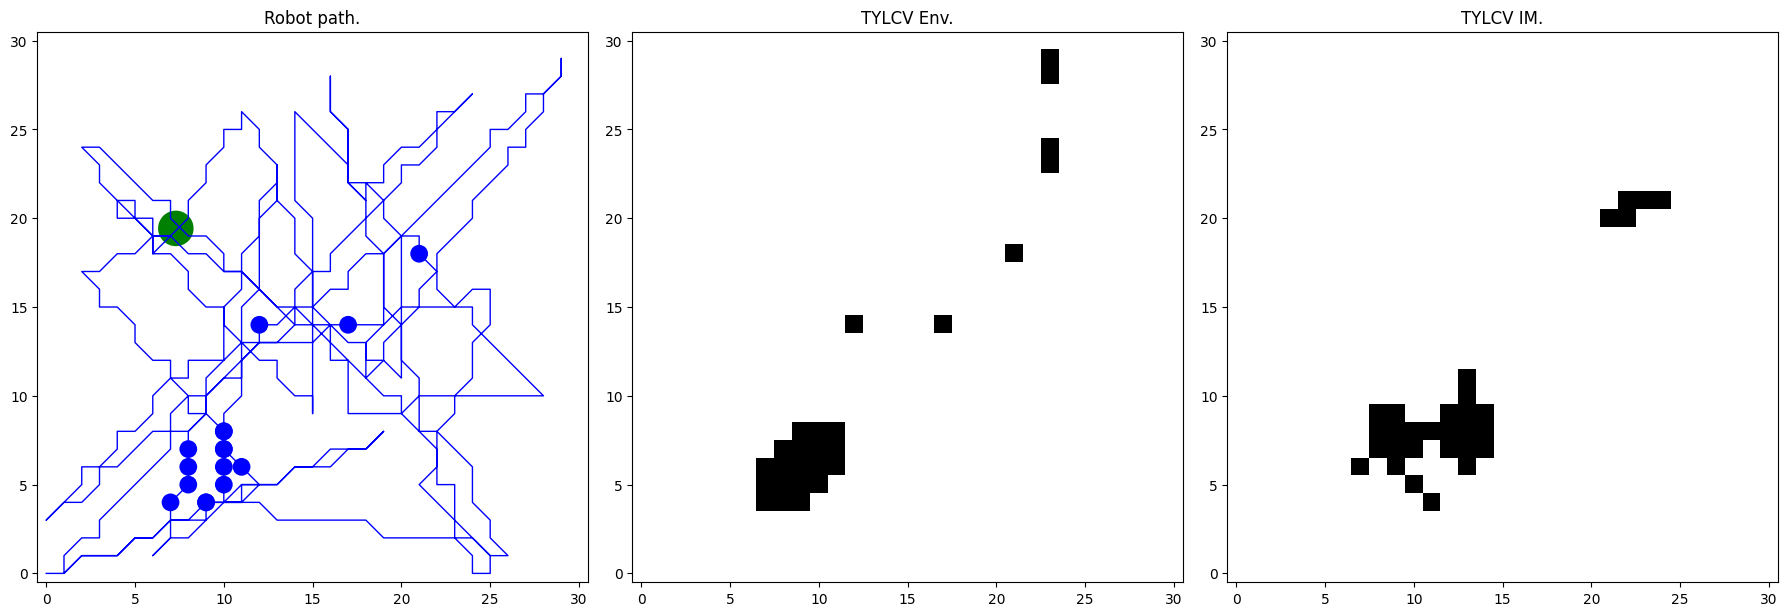

<Figure size 640x480 with 0 Axes>

In [4]:
fig, ((ax_robot_path, ax_env_tylcv, ax_im_tylcv)) = plt.subplots(1, 3, figsize=(18,6))

wbf_figures.show_empty(results, ax_robot_path)
wbf_figures.show_robot_path(results, ax_robot_path)
wbf_figures.show_detections(results, ax_robot_path, field="TYLCV")

wbf_figures.show_env_tylcv(results, ax_env_tylcv)

wbf_figures.show_im_tylcv(results, ax_im_tylcv)

#fig.suptitle("Policy", fontsize=16)
fig.tight_layout()
plt.show()
plt.savefig(pathlib.Path(results["results-basedir"], "daily-new.pdf"))